In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from sklearn.externals import joblib
import warnings
warnings.filterwarnings('ignore')

In [69]:
data=pd.read_csv('C:/Users/DC/Downloads/aggregate_covid_country.csv',parse_dates=['Date'])

In [70]:
data

,Date,Country,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,0,0,0
1,2020-01-22,Albania,0,0,0
2,2020-01-22,Algeria,0,0,0
3,2020-01-22,Andorra,0,0,0
4,2020-01-22,Angola,0,0,0
...,...,...,...,...,...
23683,2020-05-26,West Bank and Gaza,429,365,3
23684,2020-05-26,Western Sahara,9,6,1
23685,2020-05-26,Yemen,249,10,49
23686,2020-05-26,Zambia,920,336,7


In [71]:
df=pd.DataFrame(data)

In [72]:
#Date modification

df_date=pd.DataFrame()
df_date['month']=df['Date'].dt.month_name()
df_date['year']=df['Date'].dt.year
df_date['day']=df['Date'].dt.day_name()

df_date['type of day']=np.where((df_date['day']=='Sunday')| (df_date['day']=='Saturday'),'weekends','weekdays')

In [73]:
df_date

,month,year,day,type of day
0,January,2020,Wednesday,weekdays
1,January,2020,Wednesday,weekdays
2,January,2020,Wednesday,weekdays
3,January,2020,Wednesday,weekdays
4,January,2020,Wednesday,weekdays
...,...,...,...,...
23683,May,2020,Tuesday,weekdays
23684,May,2020,Tuesday,weekdays
23685,May,2020,Tuesday,weekdays
23686,May,2020,Tuesday,weekdays


In [74]:
df['day']=df_date['day']
df['month']=df_date['month']
df['type of day']=df_date['type of day']
df

,Date,Country,Confirmed,Recovered,Deaths,day,month,type of day
0,2020-01-22,Afghanistan,0,0,0,Wednesday,January,weekdays
1,2020-01-22,Albania,0,0,0,Wednesday,January,weekdays
2,2020-01-22,Algeria,0,0,0,Wednesday,January,weekdays
3,2020-01-22,Andorra,0,0,0,Wednesday,January,weekdays
4,2020-01-22,Angola,0,0,0,Wednesday,January,weekdays
...,...,...,...,...,...,...,...,...
23683,2020-05-26,West Bank and Gaza,429,365,3,Tuesday,May,weekdays
23684,2020-05-26,Western Sahara,9,6,1,Tuesday,May,weekdays
23685,2020-05-26,Yemen,249,10,49,Tuesday,May,weekdays
23686,2020-05-26,Zambia,920,336,7,Tuesday,May,weekdays


In [75]:
df.drop(['Date'],axis=1,inplace=True)


In [76]:
df

,Country,Confirmed,Recovered,Deaths,day,month,type of day
0,Afghanistan,0,0,0,Wednesday,January,weekdays
1,Albania,0,0,0,Wednesday,January,weekdays
2,Algeria,0,0,0,Wednesday,January,weekdays
3,Andorra,0,0,0,Wednesday,January,weekdays
4,Angola,0,0,0,Wednesday,January,weekdays
...,...,...,...,...,...,...,...
23683,West Bank and Gaza,429,365,3,Tuesday,May,weekdays
23684,Western Sahara,9,6,1,Tuesday,May,weekdays
23685,Yemen,249,10,49,Tuesday,May,weekdays
23686,Zambia,920,336,7,Tuesday,May,weekdays


In [77]:
df.dtypes

Country        object
Confirmed       int64
Recovered       int64
Deaths          int64
day            object
month          object
type of day    object
dtype: object

In [78]:
df.columns

Index(['Country', 'Confirmed', 'Recovered', 'Deaths', 'day', 'month',
       'type of day'],
      dtype='object')

In [79]:
df.describe()

,Confirmed,Recovered,Deaths
count,2.368800e+04,23688.000000,23688.000000
mean,7.969368e+03,2581.801714,526.935030
std,5.842109e+04,15143.101257,3992.815956
min,0.000000e+00,0.000000,0.000000
25%,0.000000e+00,0.000000,0.000000
50%,1.800000e+01,1.000000,0.000000
75%,7.300000e+02,123.000000,13.000000
max,1.680913e+06,384902.000000,98913.000000


In [80]:
df['recovery rate']= df['Recovered']/df['Confirmed']
df['death rate']= df['Deaths']/df['Confirmed']

In [81]:
df

,Country,Confirmed,Recovered,Deaths,day,month,type of day,recovery rate,death rate
0,Afghanistan,0,0,0,Wednesday,January,weekdays,NaN,NaN
1,Albania,0,0,0,Wednesday,January,weekdays,NaN,NaN
2,Algeria,0,0,0,Wednesday,January,weekdays,NaN,NaN
3,Andorra,0,0,0,Wednesday,January,weekdays,NaN,NaN
4,Angola,0,0,0,Wednesday,January,weekdays,NaN,NaN
...,...,...,...,...,...,...,...,...,...
23683,West Bank and Gaza,429,365,3,Tuesday,May,weekdays,0.850816,0.006993
23684,Western Sahara,9,6,1,Tuesday,May,weekdays,0.666667,0.111111
23685,Yemen,249,10,49,Tuesday,May,weekdays,0.040161,0.196787
23686,Zambia,920,336,7,Tuesday,May,weekdays,0.365217,0.007609


In [82]:
df.isnull().sum()

Country             0
Confirmed           0
Recovered           0
Deaths              0
day                 0
month               0
type of day         0
recovery rate    8056
death rate       8056
dtype: int64

In [83]:
df['recovery rate'].replace(np.NaN,0,inplace=True)
df['death rate'].replace(np.NaN,0,inplace=True)

In [84]:
df

,Country,Confirmed,Recovered,Deaths,day,month,type of day,recovery rate,death rate
0,Afghanistan,0,0,0,Wednesday,January,weekdays,0.000000,0.000000
1,Albania,0,0,0,Wednesday,January,weekdays,0.000000,0.000000
2,Algeria,0,0,0,Wednesday,January,weekdays,0.000000,0.000000
3,Andorra,0,0,0,Wednesday,January,weekdays,0.000000,0.000000
4,Angola,0,0,0,Wednesday,January,weekdays,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...
23683,West Bank and Gaza,429,365,3,Tuesday,May,weekdays,0.850816,0.006993
23684,Western Sahara,9,6,1,Tuesday,May,weekdays,0.666667,0.111111
23685,Yemen,249,10,49,Tuesday,May,weekdays,0.040161,0.196787
23686,Zambia,920,336,7,Tuesday,May,weekdays,0.365217,0.007609


In [85]:
df.head(10)

,Country,Confirmed,Recovered,Deaths,day,month,type of day,recovery rate,death rate
0,Afghanistan,0,0,0,Wednesday,January,weekdays,0.0,0.0
1,Albania,0,0,0,Wednesday,January,weekdays,0.0,0.0
2,Algeria,0,0,0,Wednesday,January,weekdays,0.0,0.0
3,Andorra,0,0,0,Wednesday,January,weekdays,0.0,0.0
4,Angola,0,0,0,Wednesday,January,weekdays,0.0,0.0
5,Antigua and Barbuda,0,0,0,Wednesday,January,weekdays,0.0,0.0
6,Argentina,0,0,0,Wednesday,January,weekdays,0.0,0.0
7,Armenia,0,0,0,Wednesday,January,weekdays,0.0,0.0
8,Australia,0,0,0,Wednesday,January,weekdays,0.0,0.0
9,Austria,0,0,0,Wednesday,January,weekdays,0.0,0.0


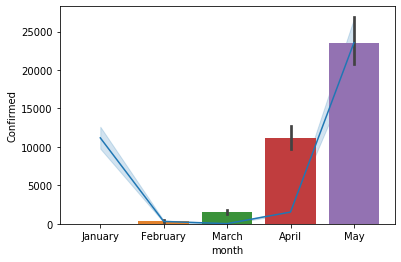

In [86]:
plt.figure()
sns.barplot('month','Confirmed',data=df)
sns.lineplot('month','Confirmed',data=df)

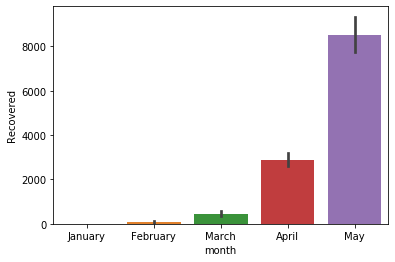

In [87]:
plt.figure()
sns.barplot('month','Recovered',data=df)

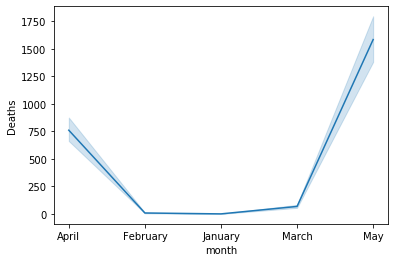

In [88]:
plt.figure()
sns.lineplot('month','Deaths',data=df)

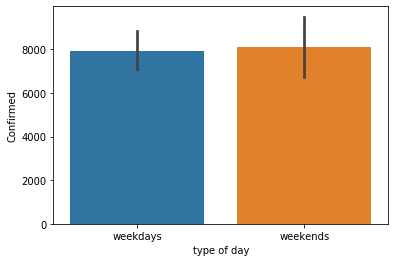

In [89]:
plt.figure()
sns.barplot('type of day','Confirmed',data=df)

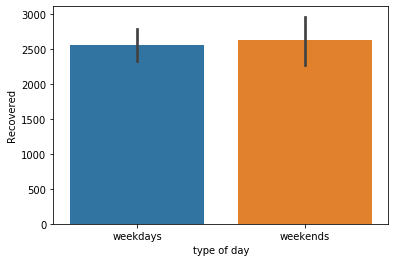

In [90]:
plt.figure()
sns.barplot('type of day','Recovered',data=df)

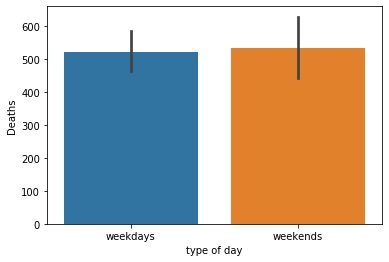

In [91]:
plt.figure()
sns.barplot('type of day','Deaths',data=df)

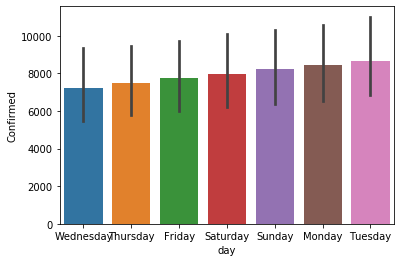

In [92]:
plt.figure()
sns.barplot('day','Confirmed',data=df)

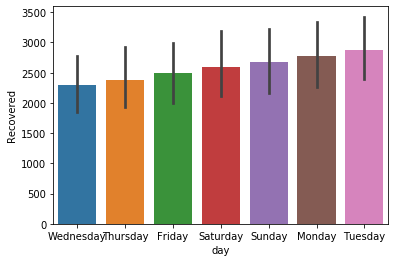

In [93]:
plt.figure()
sns.barplot('day','Recovered',data=df)

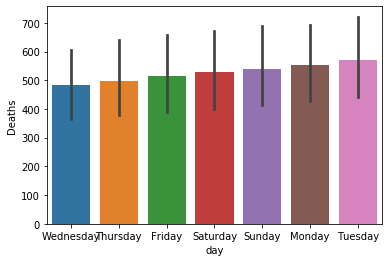

In [94]:
plt.figure()
sns.barplot('day','Deaths',data=df)

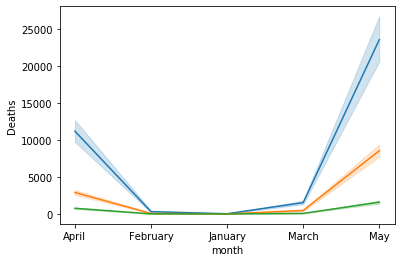

In [95]:
plt.figure()
sns.lineplot('month','Confirmed',data=df)
sns.lineplot('month','Recovered',data=df)
sns.lineplot('month','Deaths',data=df)

In [96]:
df_desc=df.sort_values(['Confirmed'],ascending=False,axis=0)

In [97]:
df_desc

,Country,Confirmed,Recovered,Deaths,day,month,type of day,recovery rate,death rate
23674,US,1680913,384902,98913,Tuesday,May,weekdays,0.228984,0.058845
23486,US,1662302,379157,98220,Monday,May,weekdays,0.228092,0.059087
23298,US,1643246,366736,97720,Sunday,May,weekends,0.223178,0.059468
23110,US,1622612,361239,97087,Saturday,May,weekends,0.222628,0.059834
22922,US,1600937,350135,95979,Friday,May,weekdays,0.218706,0.059952
...,...,...,...,...,...,...,...,...,...
5661,Bosnia and Herzegovina,0,0,0,Friday,February,weekdays,0.000000,0.000000
5662,Botswana,0,0,0,Friday,February,weekdays,0.000000,0.000000
5663,Brazil,0,0,0,Friday,February,weekdays,0.000000,0.000000
5664,Brunei,0,0,0,Friday,February,weekdays,0.000000,0.000000


In [ ]:
df['Country'].count

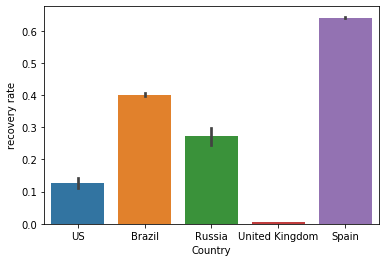

In [105]:
plt.figure()

sns.barplot('Country','recovery rate',data=df_desc.head(100))


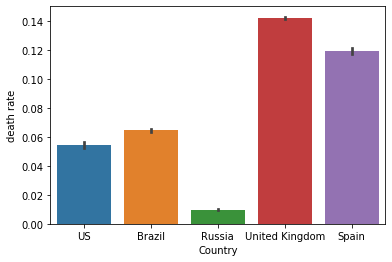

In [110]:
sns.barplot('Country','death rate',data=df_desc.head(100))

it can be seen that the USA has the highest number of confirmed cases.Spain has the highest recovery rate. UK has the highest death rate.
Tuesday has the highest number of confirmed cases,recovered cases and deaths.
There were more confirmed cases on weekends
May has the highest number of confirmed cases.